In [1]:
from src.perceptron import perceptron
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(221)
sns.set()

Using TensorFlow backend.
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
df, fd, fdi = perceptron("creditcard", 
                         number_of_epoch=300, 
                         hidden_neurons=((), (15,), (10,), (5,), (10,5), (15,5)),
                         use_batch_norm_values=(True,),
                         optimizer_values=('rmsprop', ),
                         activation_values=('sigmoid', 'relu', 'linear', 'selu'),
                         training_sizes=(-1,)
                         )

Selected data set is creditcard with 10244 data (train: 10000 , test: 244 )


In [ ]:
#mpl.plot(df.get('epoch'), df.get('val_categorical_accuracy'), 'c-', df.get('epoch'), df.get('categorical_accuracy'), 'm-')
g = sns.lmplot(x='epoch', y='val_categorical_accuracy', hue='activation', data=df, truncate=True, order=3, size=10, aspect=1.5)
# p = sns.lmplot(x='epoch', y='val_categorical_accuracy', col='layer', hue='activation', data=df, order=3, truncate=True, size=10)

In [ ]:
n = sns.lmplot(x='epoch', y='val_categorical_accuracy', hue='optimizer', data=df, truncate=True, order=3, size=10, aspect=1.5)

In [ ]:
g = sns.lmplot(x='epoch', y='val_categorical_accuracy', hue='use_batch_norm', data=df, truncate=True, order=3, size=10, aspect=1.5)

In [ ]:
g = sns.lmplot(x='epoch', y='val_categorical_accuracy', hue='activation', col='layers', data=df, truncate=True, size=10, aspect=1.5, order=4)

In [ ]:
for activation_name, act_dict in fd['rmsprop'].items():
    plt.figure()
    for k, dtl in act_dict[True].items():
        d = dtl[-1]
        plt.plot(d.get('epoch'),d.get('val_categorical_accuracy'), label=k)
    plt.ylabel('validation categorical accuracy')
    plt.xlabel('epoch')
    plt.legend()
    plt.title(activation_name)
    plt.savefig("graphs/per_"+str(activation_name)+"_"+str(k)+".png")
    plt.show()

In [ ]:
dd = {}
for activation_name, act_dict in fd['rmsprop'].items():
    for k, d in act_dict[True].items():
        if k not in dd:
            dd[k] = {}
        dd[k][activation_name] = d[-1]
        
for l, ld in dd.items():
    plt.figure()
    for a, d in ld.items():
        plt.plot(d.get('epoch'),d.get('val_categorical_accuracy'), label=a)
    plt.ylabel('validation categorical accuracy')
    plt.xlabel('epoch')
    plt.legend()
    plt.title(l)
    plt.savefig("graphs/per_"+str(l)+"_"+str(a)+".png")
    plt.show()

In [3]:
from src.utils import *

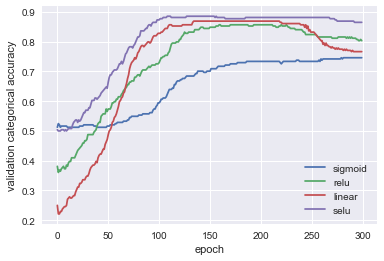

In [8]:
cd = consolidate_dict_data(fd, -2, -1, 1, 'epoch', 'scoretype', filters=[(3, (5,)), ])
plt.figure()
for a, d in cd.items():
    d = d[d['scoretype'] == 'val_categorical_accuracy']
    plt.plot(d.get('epoch'),d.get('median'), label=a)
    plt.fill_between(d.get('epoch'), d.get('mean') - d.get('std'), d.get('mean') + d.get('std'), alpha=0.3)
plt.ylabel('validation categorical accuracy')
plt.xlabel('epoch')
plt.legend()
#plt.title(l)
#plt.savefig("graphs/per_"+str(l)+"_"+str(a)+".png")
plt.show()